#                                                 coding

                                              Import Libraries

In [1]:
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyflux as pf
import statsmodels as ss
import seaborn as sns
import sys
import warnings

                                             Data Reading And Analysis

In [2]:
data=pd.read_csv("drowning-deaths-per-100000-people-1990–2017 (1).csv")

In [3]:
data.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,15.074546,14.171721,12.524720,11.983470,12.961476,13.889326,13.589857,13.412722,13.117917,...,9.265345,8.220240,7.912934,7.394095,6.846121,6.897821,6.661340,6.384963,6.264513,6.095490
1,Albania,4.375777,4.816950,4.651674,4.445671,4.341855,4.215503,4.041682,3.670634,3.494005,...,1.501464,1.401067,1.462629,1.396701,1.412901,1.404149,1.430533,1.376822,1.380790,1.359957
2,Algeria,3.723348,3.558069,3.436503,3.338045,3.369064,3.275681,3.202686,3.224755,3.120136,...,1.795027,1.709342,1.631492,1.575506,1.506447,1.488834,1.477074,1.432312,1.350009,1.258641
3,American Samoa,8.658198,8.468541,8.288642,8.142822,8.028443,7.882339,7.765906,7.652727,7.357535,...,7.385568,7.274790,7.234327,7.094085,7.016298,6.861428,6.911175,6.848659,6.845059,6.841469
4,Andorra,0.954606,0.935365,0.973840,0.889925,0.866613,0.842944,0.858249,0.790874,0.768733,...,0.635890,0.627555,0.615372,0.598539,0.589696,0.578371,0.567170,0.552334,0.551926,0.550403


In [4]:
data.info

<bound method DataFrame.info of                    Country       1990       1991       1992       1993  \
0              Afghanistan  15.074546  14.171721  12.524720  11.983470   
1                  Albania   4.375777   4.816950   4.651674   4.445671   
2                  Algeria   3.723348   3.558069   3.436503   3.338045   
3           American Samoa   8.658198   8.468541   8.288642   8.142822   
4                  Andorra   0.954606   0.935365   0.973840   0.889925   
..                     ...        ...        ...        ...        ...   
190  Virgin Islands (U.S.)   5.780419   5.545096   5.422640   5.325580   
191     West Bank and Gaza   3.223758   3.140517   3.028163   2.913352   
192                  Yemen   8.763133   8.280532   7.941501   7.656024   
193                 Zambia  10.361905  10.470169  10.254847  10.282846   
194               Zimbabwe   4.665246   4.427387   4.352618   4.354259   

          1994       1995       1996       1997       1998  ...      2008  \
0 

In [5]:
data.isna().any()

Country    False
1990       False
1991       False
1992       False
1993       False
1994       False
1995       False
1996       False
1997       False
1998       False
1999       False
2000       False
2001       False
2002       False
2003       False
2004       False
2005       False
2006       False
2007       False
2008       False
2009       False
2010       False
2011       False
2012       False
2013       False
2014       False
2015       False
2016       False
2017       False
dtype: bool

                                          Dealing With Data

In [6]:
mean_rate=data.mean()

In [7]:
mean_rate

1990    7.582025
1991    7.449400
1992    7.294776
1993    7.186321
1994    7.108752
1995    6.920043
1996    6.657503
1997    6.456300
1998    6.279254
1999    6.105761
2000    5.908521
2001    5.749664
2002    5.583535
2003    5.419772
2004    5.280770
2005    5.166850
2006    5.025984
2007    4.907024
2008    4.754825
2009    4.590528
2010    4.462883
2011    4.310544
2012    4.191935
2013    4.077531
2014    3.986290
2015    3.895111
2016    3.811392
2017    3.721385
dtype: float64

In [8]:
years=data.columns[1:]             # Columns

In [9]:
years

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'],
      dtype='object')

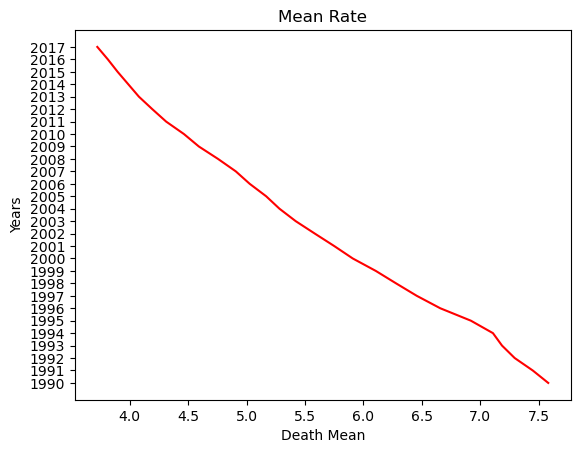

In [10]:
plt.plot(mean_rate,years,"r")
plt.title("Mean Rate")                 # plotting the data 

plt.xlabel("Death Mean")                #data is trending 
plt.ylabel("Years");

                                  Dealing With specific Country

In [11]:
Egypt=data.loc[53]                 # Extract Egypt's Row With Years

In [12]:
Egypt= Egypt.drop("Country", axis=0)           # Remove String Values 

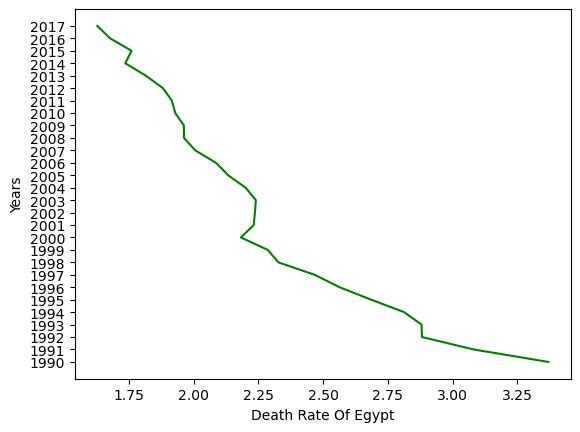

In [13]:
trend=plt.plot(Egypt,years,"g")
plt.xlabel("Death Rate Of Egypt")         #Plotting The Data and It is also Trending
plt.ylabel("Years");

                                    Stationary

In [14]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(Egypt)   #To Test If the data Stationary or NOT


In [15]:
print(adf)      #The more negative the value, the more confident we can be that the series is stationary.

-4.176878940333969


In [16]:
print(pvalue)       #  pvalue more close to zero  it is stationary

                     #So Data is Stationary

0.0007208622410180305


                                  Moving Average Smoothing
            one of the most obvious and simplest techniques you can use to capture local changes

In [17]:
series = pd.Series(Egypt)

# case with lag of 2
lag_2 = series.rolling(window=3).mean()

# case with lag of 3
lag_3 = series.rolling(window=5).mean()

# case with lag of 5
lag_5 = series.rolling(window=9).mean()

# case with lag of 10
lag_10 = series.rolling(window=19).mean()

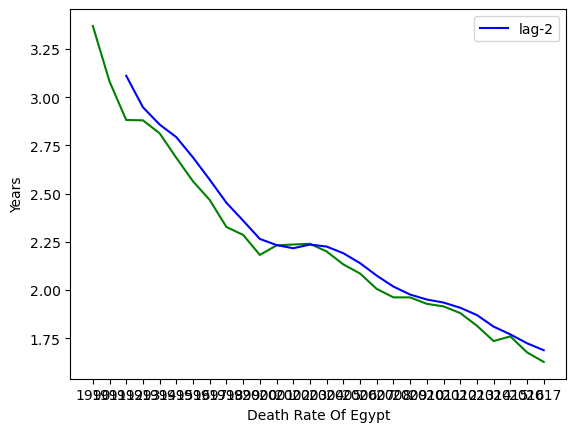

In [18]:
plt.plot(years,Egypt,"g")
plt.xlabel("Death Rate Of Egypt")
plt.ylabel("Years");                            
plt.plot(years, lag_2, 'b-', label="lag-2")
plt.legend();

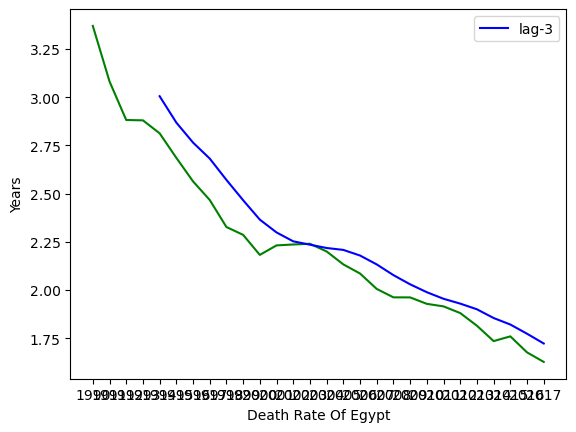

In [19]:
trend=plt.plot(years,Egypt,"g")
plt.xlabel("Death Rate Of Egypt")
plt.ylabel("Years");
plt.plot(years, lag_3, 'b-', label="lag-3")
plt.legend();

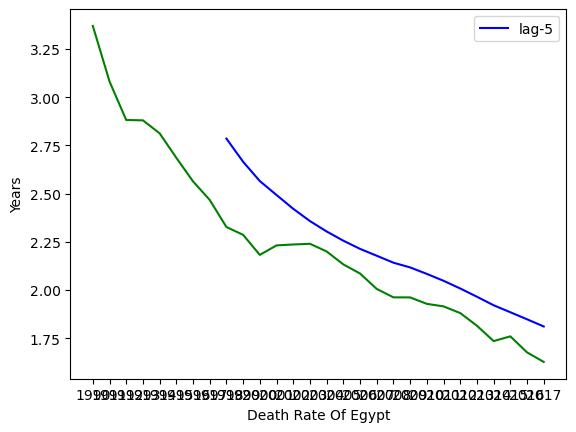

In [20]:
trend=plt.plot(years,Egypt,"g")
plt.xlabel("Death Rate Of Egypt")
plt.ylabel("Years");
plt.plot(years, lag_5, 'b-', label="lag-5")
plt.legend();

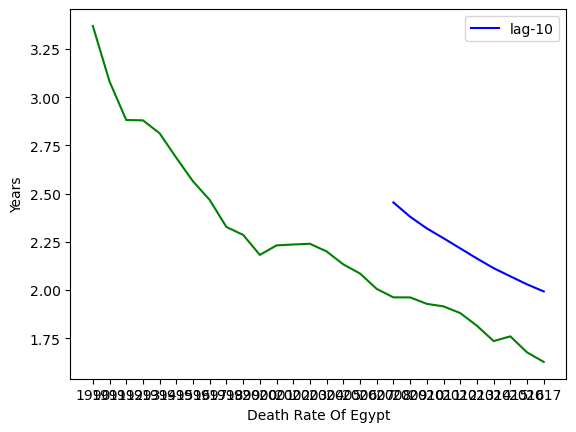

In [21]:
trend=plt.plot(years,Egypt,"g")
plt.xlabel("Death Rate Of Egypt")
plt.ylabel("Years");
plt.plot(years, lag_10, 'b-', label="lag-10")
plt.legend();

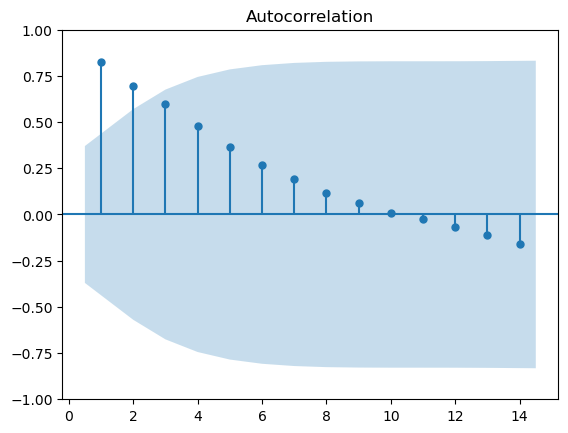

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(Egypt, lags=range(1,15), alpha=0.05)

                                        AutoCorrection Function(ACF) Plotting

                                       SARIMAX  models  ((useful forecasting model  to forecast future values))

In [37]:
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels import*

In [38]:
# define helper plot function for visualization
import statsmodels.tsa.api as sm

def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw)
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()

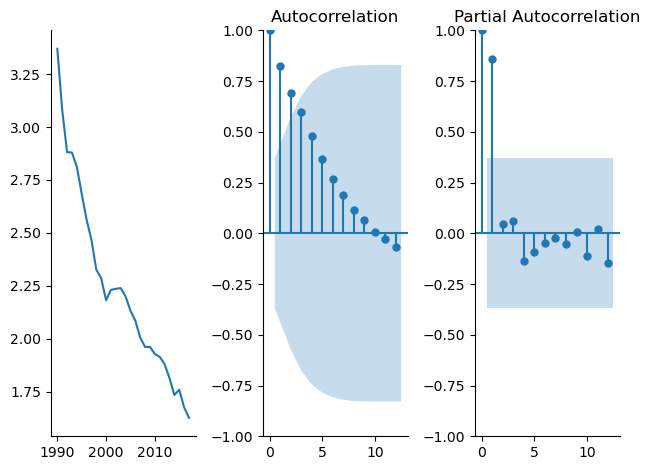

In [39]:
plots(Egypt, lags=12);

In [43]:
import statsmodels.api as sm

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(Egypt.astype(float), 
                                order=(1,1,0), 
                                seasonal_order=(0,1,0,12), 
                                trend='c').fit()
sar.summary()

E:\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
E:\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 53   No. Observations:                   28
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                  14.706
Date:                            Wed, 08 Feb 2023   AIC                            -23.411
Time:                                    18:14:25   BIC                            -21.287
Sample:                                01-01-1990   HQIC                           -23.434
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0277      0.046      0.601      0.548      -0.063       0.118
ar.L1          0.4953      0.398      1.243      0.214      -0.286       1.276
sigma2         0.0081      0.003      3.150      0.002       0.003       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.72   Prob(JB):                         0.80
Heteroskedasticity (H):               0.58   Skew:                             0.08
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""